[INFO] Loading Cleaned Dataset...
Encoding categorical features...
Splitting dataset...
Applying SMOTE to balance dataset...

 Training and Evaluating: Logistic Regression
Accuracy: 0.8025
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3191
           1       0.30      0.83      0.44       131
           2       0.74      0.98      0.85        56
           3       1.00      1.00      1.00     13316
           4       0.93      0.27      0.41      5117
           5       0.01      0.43      0.01         7
           6       0.23      0.70      0.34       193
           7       0.00      0.00      0.00         2
           8       0.06      0.20      0.10       345
           9       0.01      0.18      0.01        28
          10       0.20      0.50      0.29         2

    accuracy                           0.80     22388
   macro avg       0.41      0.55      0.40     22388
weighted avg       0.95      0

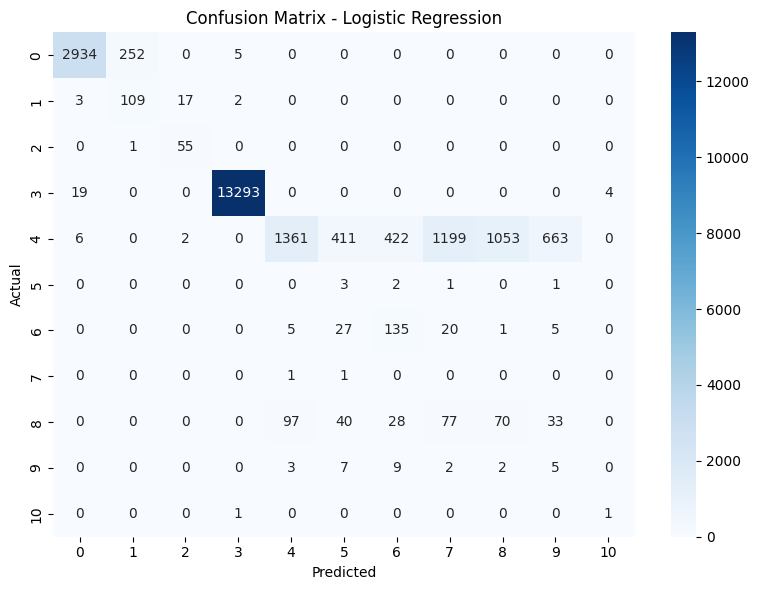


 Training and Evaluating: Random Forest
Accuracy: 0.9752
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3191
           1       0.84      0.89      0.86       131
           2       1.00      0.98      0.99        56
           3       1.00      1.00      1.00     13316
           4       0.93      0.98      0.95      5117
           5       0.00      0.00      0.00         7
           6       0.76      0.95      0.85       193
           7       0.00      0.00      0.00         2
           8       0.21      0.05      0.08       345
           9       0.00      0.00      0.00        28
          10       1.00      0.50      0.67         2

    accuracy                           0.98     22388
   macro avg       0.61      0.58      0.58     22388
weighted avg       0.97      0.98      0.97     22388



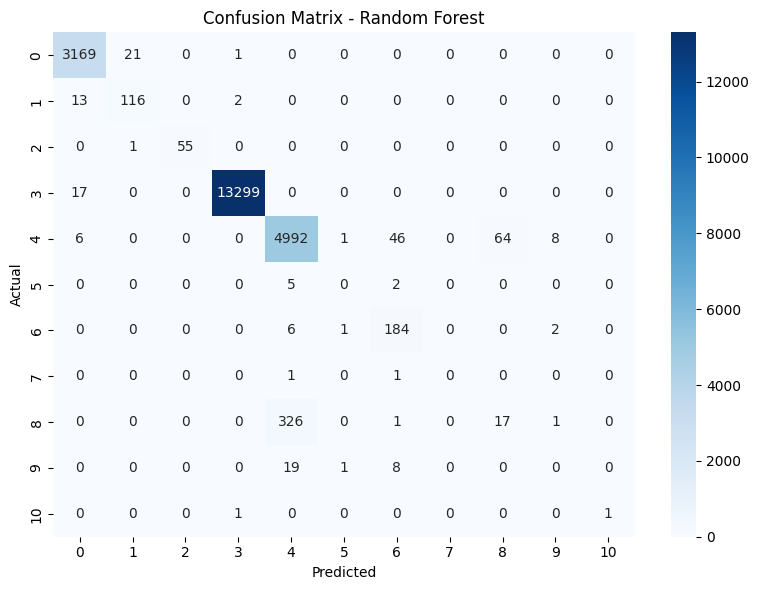


 Training and Evaluating: XGBoost
Accuracy: 0.9381
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3191
           1       0.67      0.95      0.79       131
           2       1.00      0.95      0.97        56
           3       1.00      1.00      1.00     13316
           4       0.94      0.81      0.87      5117
           5       0.04      0.43      0.08         7
           6       0.74      0.92      0.82       193
           7       0.00      0.00      0.00         2
           8       0.11      0.22      0.14       345
           9       0.03      0.18      0.04        28
          10       1.00      1.00      1.00         2

    accuracy                           0.94     22388
   macro avg       0.59      0.68      0.61     22388
weighted avg       0.97      0.94      0.95     22388



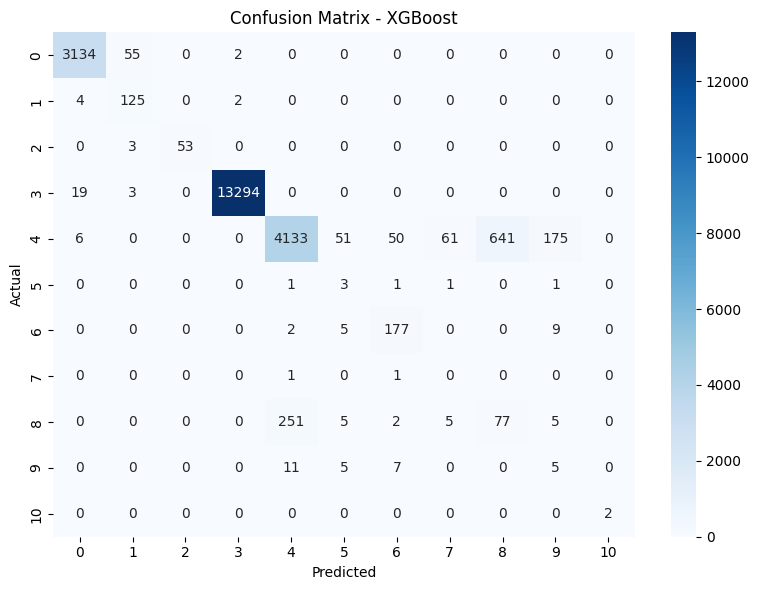


 Model Accuracy Summary:
Logistic Regression: 0.8025
Random Forest: 0.9752
XGBoost: 0.9381


In [ ]:
# Comprehensive CRISP-DM Python Implementation for Amazon Sale Report Analysis (Final Model Comparison Version)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Load cleaned dataset
print("[INFO] Loading Cleaned Dataset...")
df = pd.read_csv("Amazon_Cleaned_Sale_Report.csv")

# Encode categorical features
print("Encoding categorical features...")
label_cols = df.select_dtypes(include=['object']).columns.tolist()
le_dict = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le

# Define features and target
X = df.drop(['Status', 'Order ID', 'Date'], axis=1, errors='ignore')
y = df['Status']

# Encode target separately
le_status = LabelEncoder()
y = le_status.fit_transform(y)

# Split dataset
print("Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle Class Imbalance with SMOTE
print("Applying SMOTE to balance dataset...")
y_train_series = pd.Series(y_train)
class_counts = y_train_series.value_counts()
minority_class = class_counts.idxmin()
if class_counts[minority_class] >= 6:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
else:
    print("Skipping SMOTE due to insufficient minority class samples.")
    X_resampled, y_resampled = X_train_scaled, y_train

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, n_jobs=-1)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\n Training and Evaluating: {name}")
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Summary of model accuracies
print("\n Model Accuracy Summary:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")


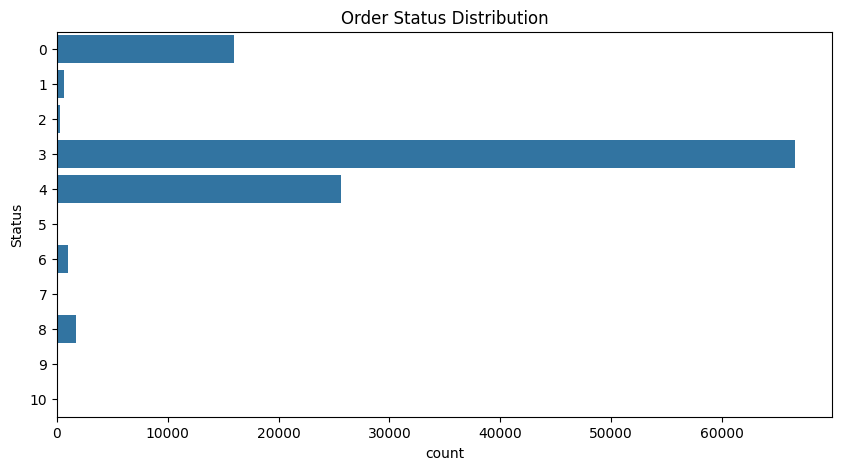

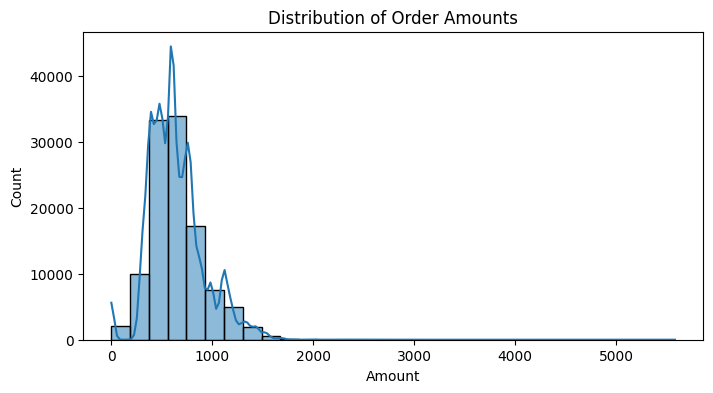

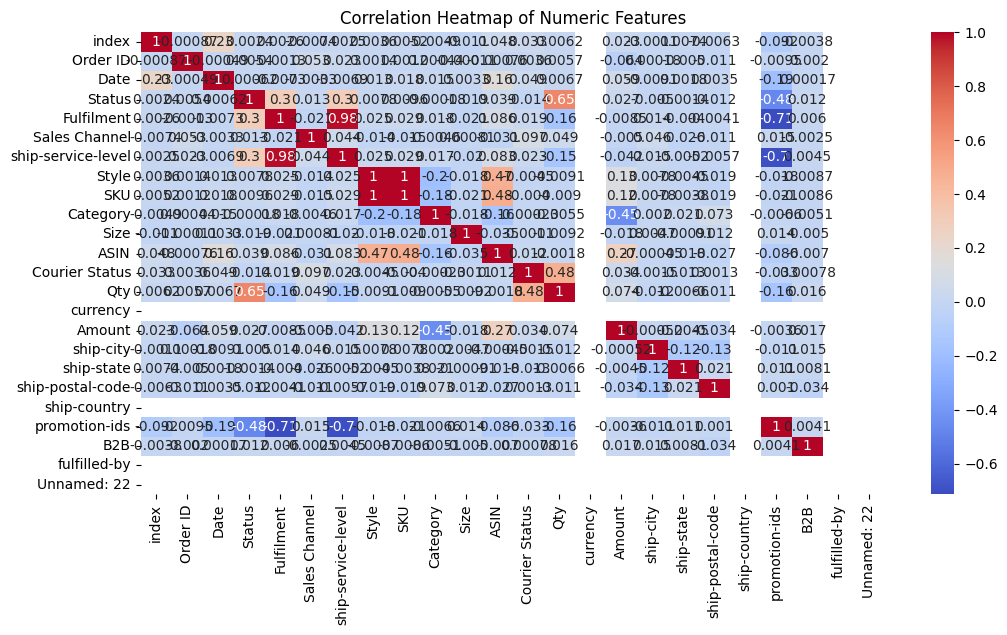

In [ ]:
# Status distribution
plt.figure(figsize=(10, 5))
sns.countplot(y='Status', data=df)
plt.title("Order Status Distribution")
plt.show()

# Amount distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Amount'], kde=True, bins=30)
plt.title("Distribution of Order Amounts")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


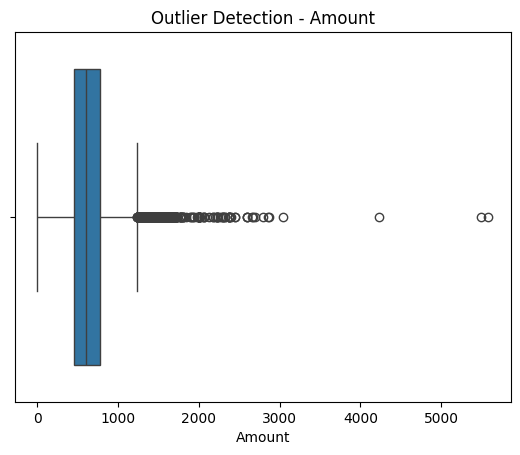

In [ ]:
# Boxplot to check outliers
sns.boxplot(x=df['Amount'])
plt.title("Outlier Detection - Amount")
plt.show()


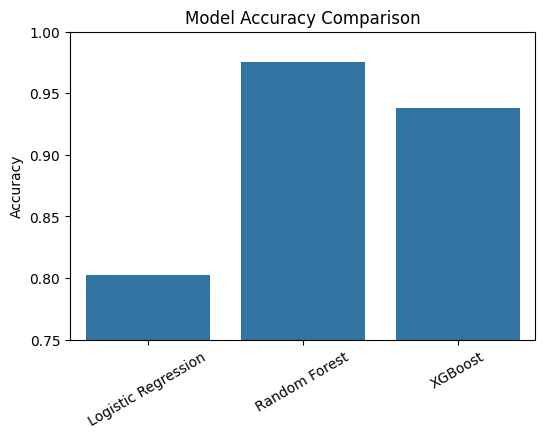

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.ylim(0.75, 1.00)
plt.show()

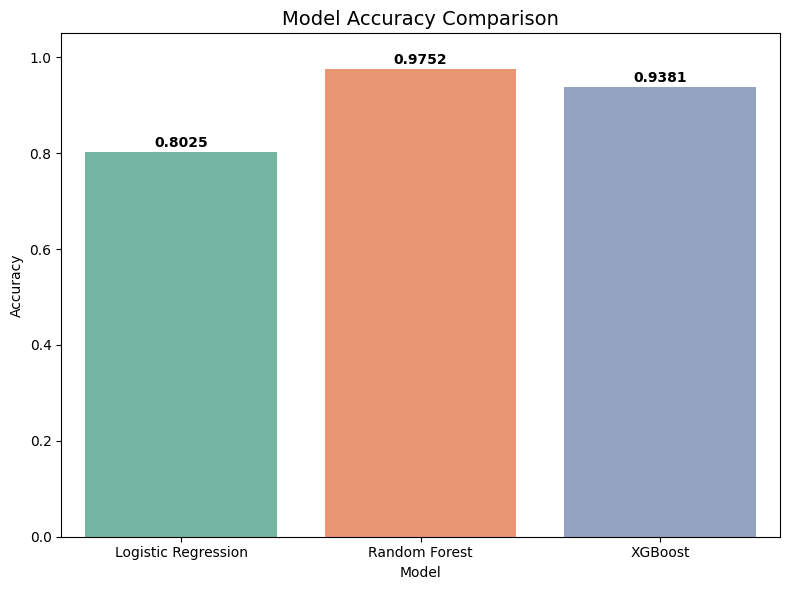

In [ ]:
# 📊 Final Visualization for Model Accuracy Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Set2")

# Add accuracy labels on top of each bar
for i, acc in enumerate(results.values()):
    plt.text(i, acc + 0.005, f"{acc:.4f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


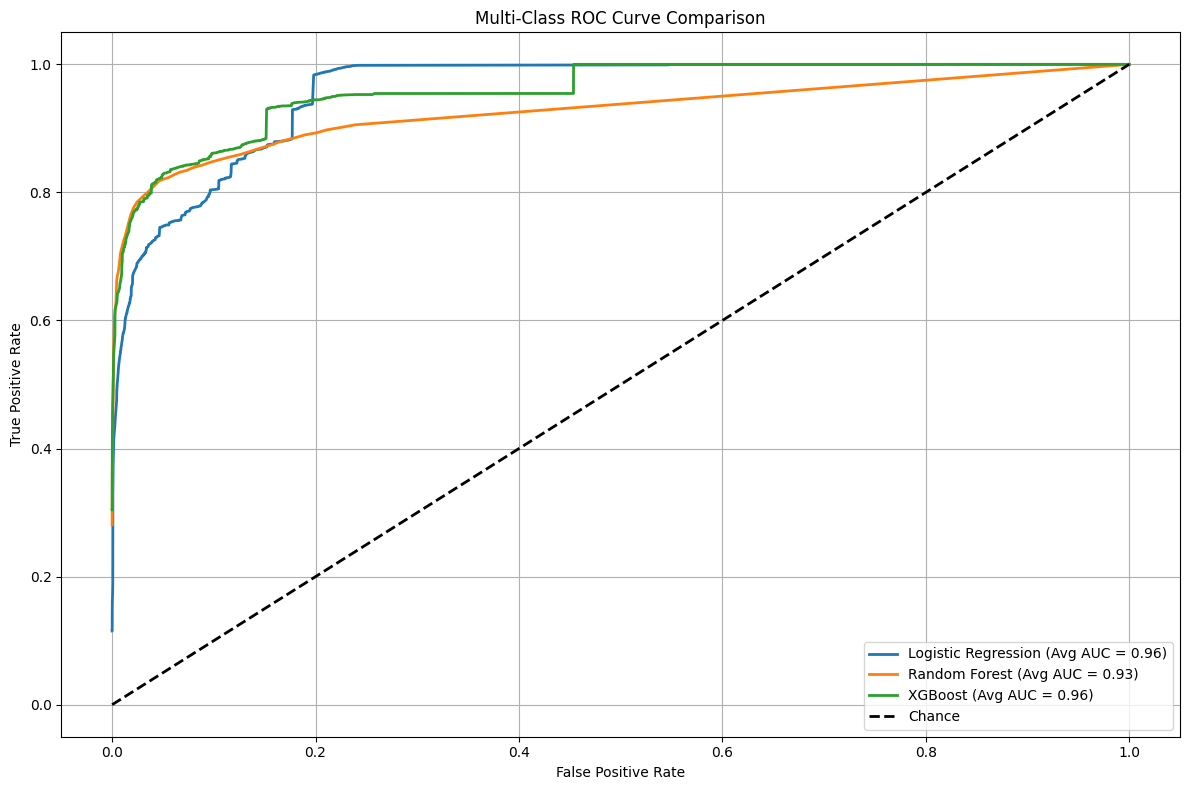

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# ROC curve plot for all models
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])

plt.figure(figsize=(12, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test_scaled)
    else:
        continue

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Average ROC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    mean_auc = auc(all_fpr, mean_tpr)

    plt.plot(all_fpr, mean_tpr, lw=2, label=f"{name} (Avg AUC = {mean_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance', lw=2)
plt.title('Multi-Class ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


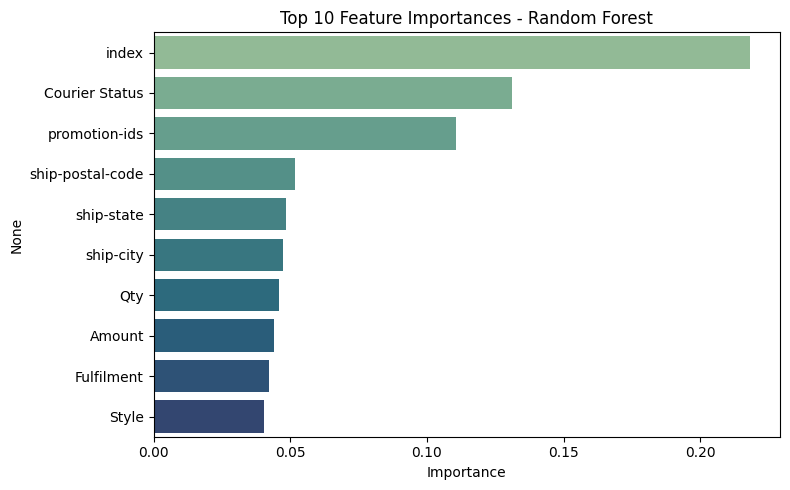

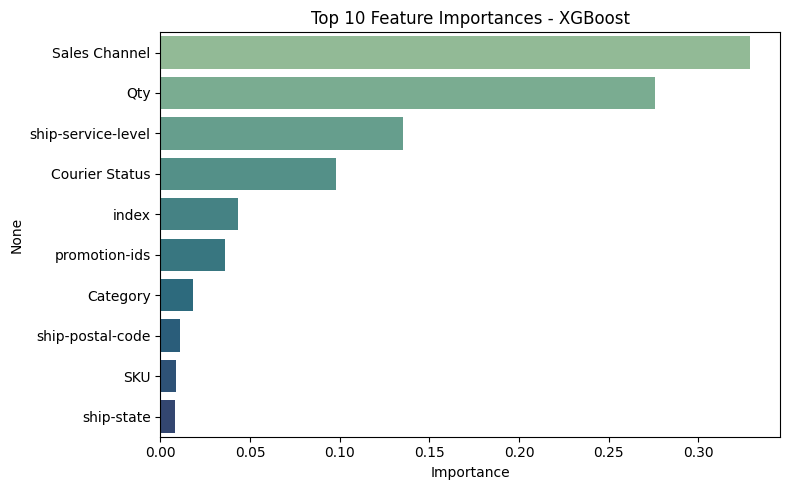

In [ ]:
# Feature Importance Comparison
for name in ['Random Forest', 'XGBoost']:
    if hasattr(models[name], 'feature_importances_'):
        importance = pd.Series(models[name].feature_importances_, index=X.columns).sort_values(ascending=False)
        plt.figure(figsize=(8, 5))
        sns.barplot(x=importance[:10], y=importance.index[:10], palette="crest")
        plt.title(f"Top 10 Feature Importances - {name}")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()


In [ ]:
from sklearn.metrics import classification_report
import csv

# Save all classification reports
with open("classification_reports.csv", "w", newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Model", "Class", "Precision", "Recall", "F1-Score", "Support"])

    for name, model in models.items():
        y_pred = model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, output_dict=True)
        for label, metrics in report.items():
            if isinstance(metrics, dict):
                writer.writerow([
                    name,
                    label,
                    round(metrics["precision"], 4),
                    round(metrics["recall"], 4),
                    round(metrics["f1-score"], 4),
                    int(metrics["support"])
                ])


In [ ]:
pd.crosstab(df['fulfilled-by'], df['Status'], normalize='index') * 100


Status,0,1,2,3,4,5,6,7,8,9,10
fulfilled-by,,,,,,,,,,,
0,14.251001,0.586943,0.251036,59.479524,22.855918,0.031268,0.862993,0.009827,1.541059,0.123285,0.007147


In [ ]:
# 1.What are the key factors influencing order fulfillment outcomes?
feature_importances = pd.Series(models['XGBoost'].feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False).head(5))


Sales Channel         0.329087
Qty                   0.276083
ship-service-level    0.135123
Courier Status        0.097813
index                 0.043507
dtype: float32


In [ ]:
#2️How does fulfillment type (Amazon vs Merchant) influence cancellations?
fulfill_vs_status = pd.crosstab(df['fulfilled-by'], df['Status'], normalize='index') * 100
print(fulfill_vs_status)

Status               0         1         2          3          4         5   \
fulfilled-by                                                                  
0             14.251001  0.586943  0.251036  59.479524  22.855918  0.031268   

Status              6         7         8         9         10  
fulfilled-by                                                    
0             0.862993  0.009827  1.541059  0.123285  0.007147  


In [ ]:
# 2. Fulfillment type vs cancellations (decoded)
print("\n2️⃣ Impact of Fulfillment Type (Decoded):")
original_df = pd.read_csv("Amazon Sale Report.csv", on_bad_lines='skip')
original_df['fulfilled-by'] = original_df['fulfilled-by'].fillna("Unknown")
original_df['Status'] = original_df['Status'].fillna("Unknown")
fulfill_vs_status = pd.crosstab(original_df['fulfilled-by'], original_df['Status'], normalize='index') * 100
print(fulfill_vs_status.loc[['Easy Ship', 'Unknown']])



2️⃣ Impact of Fulfillment Type (Decoded):
Status        Cancelled   Pending  Pending - Waiting for Pick Up   Shipped  \
fulfilled-by                                                                 
Easy Ship     17.468238  0.618683                       0.715431   0.00000   
Unknown       12.788468  0.462664                       0.000000  86.73995   

Status        Shipped - Damaged  Shipped - Delivered to Buyer  \
fulfilled-by                                                    
Easy Ship              0.002546                     73.246429   
Unknown                0.000000                      0.000000   

Status        Shipped - Lost in Transit  Shipped - Out for Delivery  \
fulfilled-by                                                          
Easy Ship                       0.01273                    0.089111   
Unknown                         0.00000                    0.000000   

Status        Shipped - Picked Up  Shipped - Rejected by Buyer  \
fulfilled-by                    

In [ ]:
# 3. Shipping priority, region, category impact (Decoded)
print("\n3️ Shipping Priority, Region, and Category Impact:")
decoded_shipping = original_df[['ship-service-level', 'ship-state', 'Category', 'Status']]
print(decoded_shipping.groupby(['ship-service-level', 'ship-state', 'Category']).size().sort_values(ascending=False).head(10))




3️ Shipping Priority, Region, and Category Impact:
ship-service-level  ship-state     Category
Expedited           MAHARASHTRA    kurta       6010
                                   Set         5949
                    KARNATAKA      kurta       4894
                                   Set         4788
                    TAMIL NADU     kurta       4290
                    TELANGANA      kurta       3484
                    UTTAR PRADESH  Set         3429
                    TELANGANA      Set         2796
Standard            MAHARASHTRA    kurta       2437
Expedited           TAMIL NADU     Set         2431
dtype: int64


In [ ]:
# 4. Customer Demographics
print("\n4️ Customer Demographics (Location & B2B):")
decoded_customer = original_df[['ship-city', 'B2B', 'Status']]
print(decoded_customer.groupby(['ship-city', 'B2B']).size().sort_values(ascending=False).head(10))



4️ Customer Demographics (Location & B2B):
ship-city  B2B  
BENGALURU  False    11161
HYDERABAD  False     8041
MUMBAI     False     6059
NEW DELHI  False     5748
CHENNAI    False     5388
PUNE       False     3821
KOLKATA    False     2358
GURUGRAM   False     1851
THANE      False     1691
LUCKNOW    False     1451
dtype: int64


In [ ]:
# 5. Seasonal Trend Insight (Approximate via Date Parsing)
print("\n5️ Seasonal Trends Effect:")
original_df['Month'] = pd.to_datetime(original_df['Date'], errors='coerce').dt.month
seasonal_cancel = original_df.groupby('Month')['Status'].value_counts(normalize=True).unstack().fillna(0) * 100
print(seasonal_cancel)



5️ Seasonal Trends Effect:
Status  Cancelled   Pending  Pending - Waiting for Pick Up    Shipped  \
Month                                                                   
3       10.526316  0.000000                       0.000000  79.532164   
4       14.545417  0.002038                       0.000000  58.982616   
5       13.972407  0.019029                       0.000000  59.529020   
6       14.067432  1.721622                       0.745417  62.872377   

Status  Shipped - Damaged  Shipped - Delivered to Buyer  \
Month                                                     
3                0.000000                      9.356725   
4                0.000000                     24.619398   
5                0.000000                     24.743102   
6                0.002653                     16.635276   

Status  Shipped - Lost in Transit  Shipped - Out for Delivery  \
Month                                                           
3                        0.000000               

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = df.drop(['Status', 'Order ID', 'Date'], axis=1, errors='ignore')
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(5)
print(top_features)


Qty                   0.481508
Fulfilment            0.248390
Courier Status        0.150207
promotion-ids         0.083455
ship-service-level    0.020148
dtype: float32


In [ ]:
decoded_fulfill = df.copy()
status_map = {
    0: 'Cancelled', 1: 'Pending', 2: 'Pending - Waiting for Pick Up', 3: 'Shipped',
    4: 'Shipped - Delivered to Buyer', 5: 'Shipped - Damaged', 6: 'Shipped - Lost in Transit',
    7: 'Shipped - Out for Delivery', 8: 'Shipped - Picked Up', 9: 'Shipped - Rejected by Buyer',
    10: 'Shipped - Returned to Seller', 11: 'Shipped - Returning to Seller', 12: 'Shipping'
}
decoded_fulfill['Status'] = decoded_fulfill['Status'].map(status_map)
decoded_fulfill['fulfilled-by'] = decoded_fulfill['fulfilled-by'].map({0: 'Easy Ship', 1: 'Unknown'})

fulfill_vs_status = pd.crosstab(decoded_fulfill['fulfilled-by'], decoded_fulfill['Status'], normalize='index') * 100
print(fulfill_vs_status.round(2))



Status        Cancelled  Pending  Pending - Waiting for Pick Up  Shipped  \
fulfilled-by                                                               
Easy Ship         14.25     0.59                           0.25    59.48   

Status        Shipped - Damaged  Shipped - Delivered to Buyer  \
fulfilled-by                                                    
Easy Ship                  0.03                         22.86   

Status        Shipped - Lost in Transit  Shipped - Out for Delivery  \
fulfilled-by                                                          
Easy Ship                          0.86                        0.01   

Status        Shipped - Picked Up  Shipped - Rejected by Buyer  \
fulfilled-by                                                     
Easy Ship                    1.54                         0.12   

Status        Shipped - Returned to Seller  
fulfilled-by                                
Easy Ship                             0.01  


In [ ]:
top_combinations = df.groupby(['ship-service-level', 'ship-state', 'Category']).size().sort_values(ascending=False).head(10)
print(top_combinations)


ship-service-level  ship-state  Category
0                   28          5           5218
                                8           5044
                    23          8           4116
                                5           4105
                    53          8           3540
                    56          5           2986
                    54          8           2890
                                5           2384
1                   28          8           2215
0                   53          5           2069
dtype: int64


In [ ]:
top_cities = df.groupby(['ship-city', 'B2B']).size().sort_values(ascending=False).head(10)
print(top_cities)


ship-city  B2B
711        0      9529
2677       0      6868
4433       0      5304
4983       0      5002
1348       0      4592
5699       0      3289
3437       0      2113
2411       0      1629
7015       0      1479
4066       0      1250
dtype: int64


In [ ]:
import pandas as pd

# Load the raw data
original_df = pd.read_csv("Amazon Sale Report.csv", dtype=str)

# Fill missing values
original_df['ship-city'] = original_df['ship-city'].fillna("Unknown")
original_df['B2B'] = original_df['B2B'].fillna("0")

# Standardize B2B column (convert to 0/1 if needed)
b2b_cleaned = original_df['B2B'].str.lower().str.strip()
non_b2b_df = original_df[(b2b_cleaned == "0") | (b2b_cleaned == "false") | (b2b_cleaned == "no")]

# Count top cities
top_cities = non_b2b_df['ship-city'].value_counts().head(10)

print("Top 10 Customer Cities (Non-B2B Orders):\n")
print(top_cities)


Top 10 Customer Cities (Non-B2B Orders):

ship-city
BENGALURU    11161
HYDERABAD     8041
MUMBAI        6059
NEW DELHI     5748
CHENNAI       5388
PUNE          3821
KOLKATA       2358
GURUGRAM      1851
THANE         1691
LUCKNOW       1451
Name: count, dtype: int64


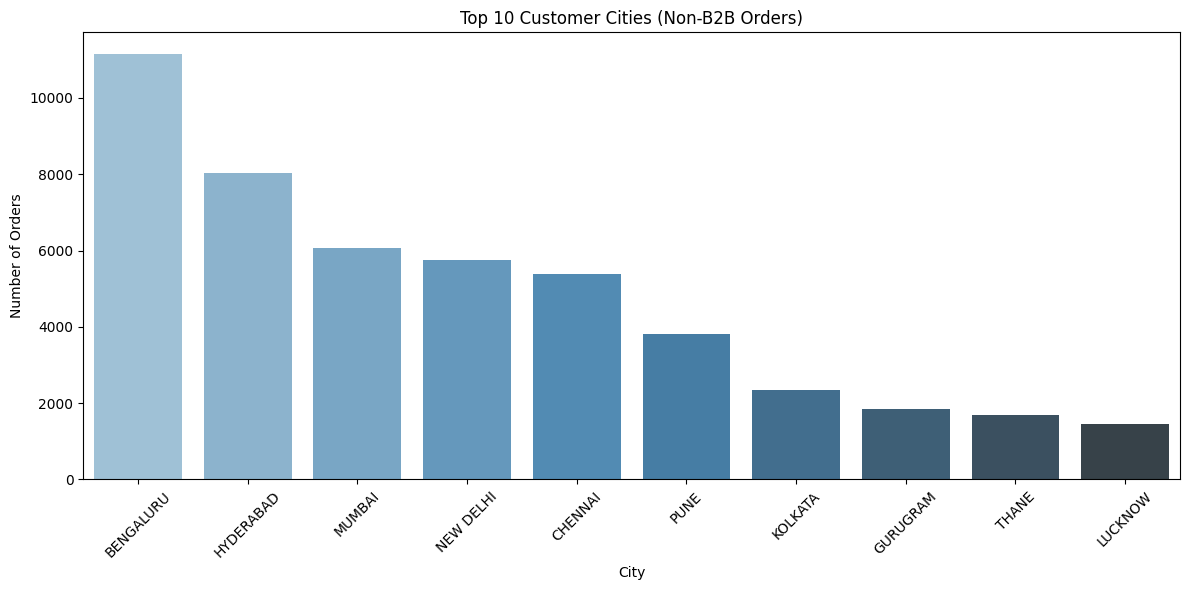

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Amazon Sale Report.csv", dtype=str)
df['ship-city'] = df['ship-city'].fillna("Unknown")
df['B2B'] = df['B2B'].fillna("0").str.lower().str.strip()

non_b2b_df = df[df['B2B'].isin(["0", "false", "no"])]
top_cities = non_b2b_df['ship-city'].value_counts().head(10).reset_index()
top_cities.columns = ['City', 'Orders']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='City', y='Orders', palette='Blues_d')
plt.title("Top 10 Customer Cities (Non-B2B Orders)")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


In [ ]:
df['Month'] = pd.to_datetime(df['Date'], errors='coerce').dt.month
month_vs_status = pd.crosstab(df['Month'], df['Status'], normalize='index') * 100
month_vs_status = month_vs_status.rename(columns=status_map)
print(month_vs_status.round(2))


Status  Cancelled  Pending  Pending - Waiting for Pick Up  Shipped  \
Month                                                                
3           10.53     0.00                           0.00    79.53   
4           14.55     0.00                           0.00    58.98   
5           13.97     0.02                           0.00    59.53   
6           14.07     1.72                           0.75    62.87   

Status  Shipped - Damaged  Shipped - Delivered to Buyer  \
Month                                                     
3                     0.0                          9.36   
4                     0.0                         24.62   
5                     0.0                         24.74   
6                     0.0                         16.64   

Status  Shipped - Lost in Transit  Shipped - Out for Delivery  \
Month                                                           
3                            0.00                        0.00   
4                            

In [ ]:
# Extract month
df['Month'] = pd.to_datetime(df['Date'], errors='coerce').dt.month

# Compute monthly distribution of statuses
month_vs_status = pd.crosstab(df['Month'], df['Status'], normalize='index') * 100

# Round values for clarity
print(month_vs_status.round(2))


Status  Cancelled  Pending  Pending - Waiting for Pick Up  Shipped  \
Month                                                                
3           10.53     0.00                           0.00    79.53   
4           14.55     0.00                           0.00    58.98   
5           13.97     0.02                           0.00    59.53   
6           14.07     1.72                           0.75    62.87   

Status  Shipped - Damaged  Shipped - Delivered to Buyer  \
Month                                                     
3                     0.0                          9.36   
4                     0.0                         24.62   
5                     0.0                         24.74   
6                     0.0                         16.64   

Status  Shipped - Lost in Transit  Shipped - Out for Delivery  \
Month                                                           
3                            0.00                        0.00   
4                            

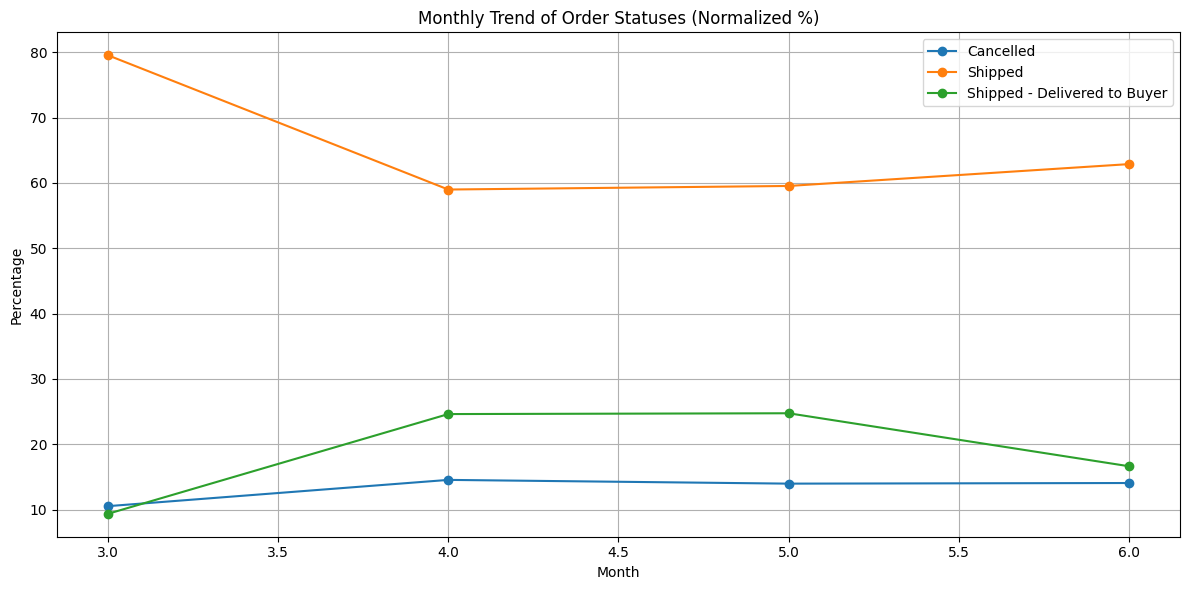

In [ ]:
import matplotlib.pyplot as plt

# Line Plot
plt.figure(figsize=(12, 6))
for col in ['Cancelled', 'Shipped', 'Shipped - Delivered to Buyer']:
    if col in month_vs_status.columns:
        plt.plot(month_vs_status.index, month_vs_status[col], marker='o', label=col)

plt.title("Monthly Trend of Order Statuses (Normalized %)")
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



3️⃣ Shipping Priority, Region, and Category Impact:
ship-service-level  ship-state     Category
Expedited           MAHARASHTRA    kurta       6010
                                   Set         5949
                    KARNATAKA      kurta       4894
                                   Set         4788
                    TAMIL NADU     kurta       4290
                    TELANGANA      kurta       3484
                    UTTAR PRADESH  Set         3429
                    TELANGANA      Set         2796
Standard            MAHARASHTRA    kurta       2437
Expedited           TAMIL NADU     Set         2431
dtype: int64

⏱️ Estimating Delivery Time (Simulated):
ship-service-level
Expedited    3.0
Standard     6.0
Name: Estimated_Delivery_Days, dtype: float64

💰 Estimating Delivery Cost (Approximate):
ship-service-level
Expedited    100.0
Standard      40.0
Name: Estimated_Shipping_Cost, dtype: float64


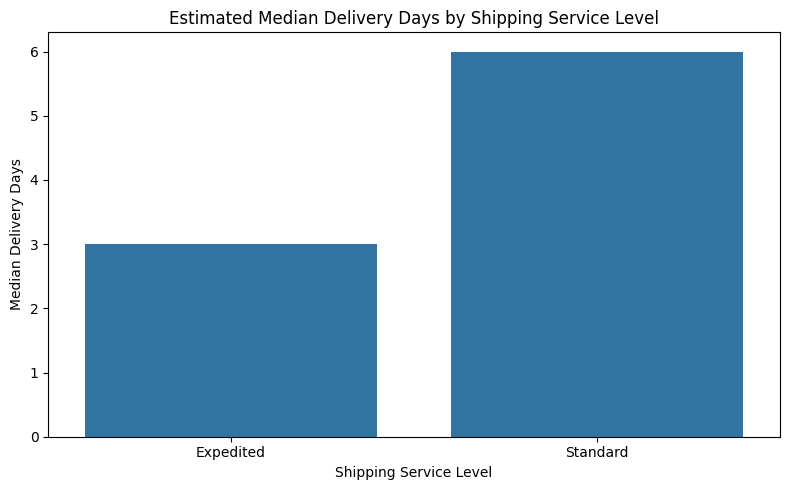

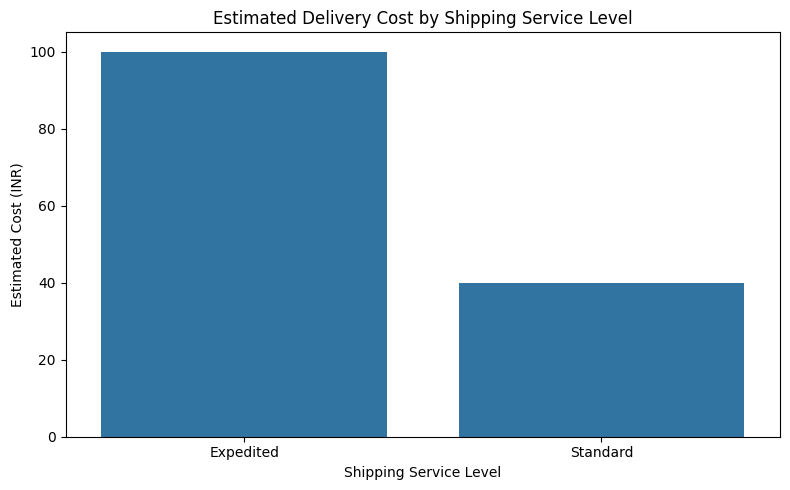

In [ ]:
# 3. Shipping Priority, Region, and Category Impact (Decoded)
print("\n3️⃣ Shipping Priority, Region, and Category Impact:")
decoded_shipping = original_df[['ship-service-level', 'ship-state', 'Category', 'Status']]
top_shipping_combos = decoded_shipping.groupby(['ship-service-level', 'ship-state', 'Category']).size().sort_values(ascending=False).head(10)
print(top_shipping_combos)

# --- CONTINUED ANALYSIS: Estimating Delivery Time and Cost ---

# 1. Estimate Delivery Time (Simulated, since we lack actual delivered dates)
print("\n⏱️ Estimating Delivery Time (Simulated):")
original_df['Date'] = pd.to_datetime(original_df['Date'], errors='coerce')

# Simulate Delivered Date based on Status — assume delivery takes:
# - 3 days for Expedited, 6 days for Standard
original_df['Delivered_Date_Sim'] = original_df['Date'] + pd.to_timedelta(
    original_df['ship-service-level'].map({'Expedited': 3, 'Standard': 6}), unit='D'
)

original_df['Estimated_Delivery_Days'] = (original_df['Delivered_Date_Sim'] - original_df['Date']).dt.days
delivery_time_by_service = original_df.groupby('ship-service-level')['Estimated_Delivery_Days'].median()
print(delivery_time_by_service)

# 2. Estimate Delivery Cost
print("\n💰 Estimating Delivery Cost (Approximate):")
original_df['Estimated_Shipping_Cost'] = original_df['ship-service-level'].apply(
    lambda x: 100 if x == 'Expedited' else 40
)
cost_summary = original_df.groupby('ship-service-level')['Estimated_Shipping_Cost'].mean()
print(cost_summary)

# Optional visualization (bar charts)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=delivery_time_by_service.index, y=delivery_time_by_service.values)
plt.title("Estimated Median Delivery Days by Shipping Service Level")
plt.ylabel("Median Delivery Days")
plt.xlabel("Shipping Service Level")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=cost_summary.index, y=cost_summary.values)
plt.title("Estimated Delivery Cost by Shipping Service Level")
plt.ylabel("Estimated Cost (INR)")
plt.xlabel("Shipping Service Level")
plt.tight_layout()
plt.show()
